In [1]:
import scanpy as sc

import scipy
import pandas as pd
#import os
import numpy as np


#import anndata as ad

import multigrate as mtg

#from scipy import sparse
from matplotlib import pyplot as plt

sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.3 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.6.1


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
rna_10x = sc.read('../data/10xpbmc10k-2020/expressions.h5ad')
rna_10x

AnnData object with n_obs × n_vars = 10000 × 3999
    obs: 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
rna_kot = sc.read('../data/kotliarov-2020/rna/expressions.h5ad')
rna_kot

AnnData object with n_obs × n_vars = 52117 × 20245
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [5]:
rna_gra = sc.read('../data/granja-2019/scRNA/expressions-all.h5ad')
rna_gra

AnnData object with n_obs × n_vars = 53638 × 20287
    obs: 'Group', 'nUMI_pre', 'nUMI', 'nGene', 'cell_type', 'Barcode', 'condition'
    var: 'gene_id', 'exonLength', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_umap'

In [6]:
cite_kot = sc.read('../data/kotliarov-2020/cite/protein.h5ad')
cite_kot

AnnData object with n_obs × n_vars = 52117 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [7]:
cite_gra = sc.read('../data/granja-2019/scADT/protein-all.h5ad')
cite_gra

AnnData object with n_obs × n_vars = 52885 × 21
    obs: 'Group', 'nUMI_pre', 'nUMI', 'nGene', 'cell_type', 'Barcode', 'condition', 'n_genes'
    var: 'n_cells'
    obsm: 'X_umap'

In [8]:
cite_gra.layers['count'] = cite_gra.raw.X

In [9]:
com_index = rna_gra.obs.index.intersection(cite_gra.obs.index)
rna_gra = rna_gra[com_index]
cite_gra = cite_gra[com_index]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [10]:
rna_gra.layers['count'] = rna_gra.raw.X

In [11]:
common_rna = list(set(rna_kot.var_names) & set(rna_10x.var_names) & set(rna_gra.var_names))
len(common_rna)

2404

In [12]:
rna_kot.obs['study'] = 'kotliarov'
rna_10x.obs['study'] = '10x'
rna_gra.obs['study'] = 'granja'

In [15]:
rna_10x_ = rna_10x[:, common_rna]
rna_kot_ = rna_kot[:, common_rna]
rna_gra_ = rna_gra[:, common_rna]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [16]:
#rna_10x_.X = rna_10x_.layers['count']
#rna_kot_.X = rna_kot_.layers['count']
#rna_gra_.X = rna_gra_.layers['count']

In [17]:
#common = rna_kot.concatenate(rna_10x, rna_gra)

In [18]:
cite_kot.var_names = [gene.split('_')[0] for gene in cite_kot.var_names]

In [19]:
common_protein = list(set(cite_kot.var_names) & set(cite_gra.var_names))
len(common_protein)

17

In [20]:
cite_kot.obs['study'] = 'kotliarov'
cite_gra.obs['study'] = 'granja'

Trying to set attribute `.obs` of view, copying.


In [21]:
cite_kot.X = scipy.sparse.csr_matrix(cite_kot.X)
cite_gra.X = scipy.sparse.csr_matrix(cite_gra.X)

In [22]:
cite_kot_ = cite_kot[:, common_protein]
cite_gra_ = cite_gra[:, common_protein]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [23]:
#cite_kot_.X = cite_kot_.layers['count']
#cite_gra_.X = cite_gra_.layers['count']

In [24]:
atac_10x = sc.read('../data/10xpbmc10k-2020/peaks.h5ad')
atac_10x

AnnData object with n_obs × n_vars = 10000 × 40086
    obs: 'cell_type', 'nb_features'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

In [25]:
atac_10x.obs['study'] = '10x'

In [26]:
atac_10x_ = atac_10x
#atac_10x_.X = atac_10x.layers['binary']

In [27]:
n_samples = 10000
q_n_samples = 10000 
np.random.seed(42)

query_sample_indices = np.random.choice(rna_gra_.shape[0], size=q_n_samples, replace=False)
sample_indices = np.random.choice(rna_kot_.shape[0], size=n_samples, replace=False)

rna_gra_ = rna_gra_[query_sample_indices]
cite_gra_ = cite_gra_[query_sample_indices]

rna_kot_ = rna_kot_[sample_indices]
cite_kot_ = cite_kot_[sample_indices]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [68]:
model = mtg.models.MultiVAE(
    adatas=[[rna_10x_, rna_kot_], [atac_10x_], [cite_kot_]],
    names=[['RNA-10x', 'RNA-Kotliarov'], ['ATAC-10x'], ['CITE-kotliarov']],
    pair_groups=[[0, 1], [0], [1]],
    condition='1',
    z_dim=15,
    h_dim=17,
    losses=['mse', 'mse', 'mse'],
    hiddens=[[], [], []],
    output_activations=['linear', 'linear', 'linear'], # actually will be softmax, sigmoid, linear
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-3,
    integ_coef=1e-1,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [69]:
model.train(
    n_iters=15000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=5000,
    validate_every=1000,
)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |█-------------------| 6.7% iter=1001/15000, time=400.39(s), loss=1.1573, recon=1.0135, kl=35.6528, integ=13.8899, val_loss=0.5585, val_recon=0.4458, val_kl=46.7658, val_integ=10.3346
 |██------------------| 13.3% iter=2001/15000, time=396.43(s), loss=0.6606, recon=0.5592, kl=66.6116, integ=8.1153, val_loss=0.4386, val_recon=0.3499, val_kl=62.2664, val_integ=6.3844
 |████----------------| 20.0% iter=3001/15000, time=396.60(s), loss=0.5430, recon=0.4596, kl=70.2066, integ=4.5568, val_loss=0.3893, val_recon=0.3113, val_kl=61.3976, val_integ=4.1215
 |█████---------------| 26.7% iter=4001/15000, time=397.73(s), loss=0.5033, recon=0.4261, kl=61.4801, integ=3.3090, val_loss=0.3844, val_recon=0.3103, val_kl=52.8749, val_integ=3.1792
 |██████--------------| 33.3% iter=5001/15000, time=396.31(s), loss=0.5124, recon=0.4382, kl=53.0625, integ=2.6543, val_loss=0.3880, val_recon=0.3194, val_kl=43.2805, val_integ=2.5295
 |████████------------| 40.0% iter=6001/15000, time=396.34(s), loss=0.4631, rec

In [70]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,val_loss,val_recon,val_kl,val_integ
0,1000,1.157338,1.013481,35.652825,13.889899,0.558457,0.445759,46.765822,10.334567
1,2000,0.660591,0.559196,66.611562,8.115297,0.438647,0.349897,62.266415,6.384375
2,3000,0.542980,0.459566,70.206599,4.556835,0.389326,0.311273,61.397565,4.121478
3,4000,0.503319,0.426139,61.480062,3.308999,0.384391,0.310300,52.874934,3.179167
4,5000,0.512378,0.438219,53.062511,2.654271,0.388011,0.319436,43.280457,2.529490
5,6000,0.463061,0.392976,46.197142,2.388812,0.384688,0.320584,40.536597,2.356678
6,7000,0.446637,0.376623,45.244326,2.476948,0.384491,0.322263,39.438643,2.278888
7,8000,0.470197,0.401691,43.801657,2.470480,0.381680,0.321970,37.571743,2.213835
8,9000,0.446048,0.380533,42.053324,2.346095,0.385419,0.325967,37.738039,2.171335
9,10000,0.451742,0.387034,41.691783,2.301634,0.377109,0.317866,37.006251,2.223658


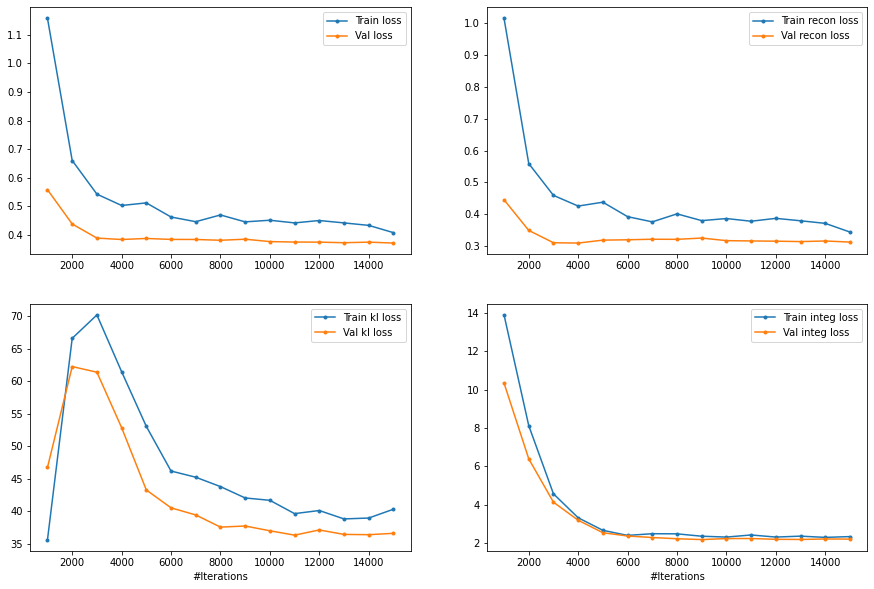

In [72]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

plt.savefig('losses.png')

In [73]:
z = model.predict(
    adatas=[[rna_10x_, rna_kot_], [atac_10x_], [cite_kot_]],
    names=[['RNA-10x', 'RNA-Kotliarov'], ['ATAC-10x'], ['CITE-kotliarov']],
    batch_size=64,
)
z

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 40000 × 15
    obs: 'modality', 'barcode', 'cell_type', 'batch'

In [74]:
sc.tl.pca(z, svd_solver='arpack')

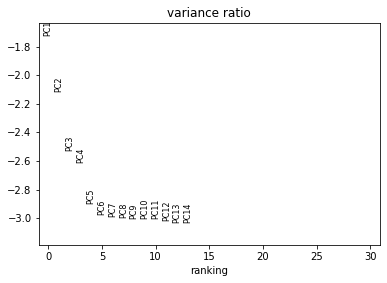

In [75]:
sc.pl.pca_variance_ratio(z, log=True)

In [76]:
sc.pp.neighbors(z)
sc.tl.umap(z)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'barcode' as categorical
... storing 'cell_type' as categorical


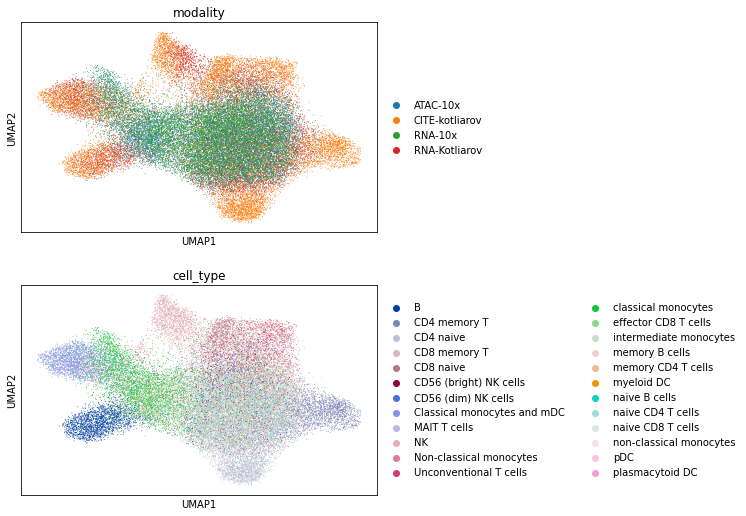

In [77]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

In [78]:
z.write('ref_new1.h5ad')

In [79]:
new_model = mtg.operate(model, 
                   adatas=[[rna_gra_], [], [cite_gra_]],
                    names=[['query-RNA-Granja'], [], ['query-CITE-Granja']],
                    pair_groups=[[0], [], [0]],
                    fine_tune='cond_weights')

In [ ]:
new_model.train(
    n_iters=5000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=2000
)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |████----------------| 20.0% iter=1001/5000, time=163.40(s), loss=2.2250, recon=2.2056, kl=21.6863, integ=1.3436, val_loss=2.0119, val_recon=1.9897, val_kl=21.1668, val_integ=1.1617
 |████████------------| 40.0% iter=2001/5000, loss=2.0474, recon=2.0121, kl=22.3776, integ=1.2962

In [213]:
z = new_model.predict(
    adatas=[[rna_10x_, rna_kot_, rna_gra_], [atac_10x_], [cite_kot_, cite_gra_]],
    names=[['RNA-10x', 'RNA-Kotliarov', 'query-RNA-Granja'], ['ATAC-10x'], ['CITE-kotliarov', 'query-CITE-Granja']],
    batch_labels=[[0, 1, 2], [0], [0, 1]], #same as in train
    batch_size=64,
)
z

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


KeyboardInterrupt: 

In [ ]:
sc.tl.pca(z, svd_solver='arpack')

In [ ]:
sc.pl.pca_variance_ratio(z, log=True)

In [ ]:
sc.pp.neighbors(z)
sc.tl.umap(z)

In [ ]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

In [ ]:
z.write('all4.h5ad')